In [55]:
# Step 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Load and prepare data
import pandas as pd
import numpy as np
import re

# Replace with your actual filename
df = pd.read_csv("telegram_data_cleaned.csv")

# Step 3: Basic cleanup and rename if needed
df.rename(columns={"Channel Title": "vendor", "Date": "timestamp"}, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop rows with invalid timestamps
df = df.dropna(subset=['timestamp'])

# Optional: Simulate 'views' if not present (since it's not in the sample)
# You can replace this with real views if available
np.random.seed(42)
df['views'] = np.random.randint(800, 2000, size=len(df))

# Step 4: Extract product prices (e.g., from messages like "ዋጋ፦ 8500 ብር")
def extract_price(text):
    match = re.search(r'(\d{2,6})\s*ብር', str(text))
    return int(match.group(1)) if match else np.nan

df['price'] = df['cleaned_message'].apply(extract_price)

# Step 5: Aggregate vendor metrics
vendor_metrics = []

for vendor, group in df.groupby("vendor"):
    total_posts = len(group)
    weeks = (group['timestamp'].max() - group['timestamp'].min()).days / 7 or 1
    posts_per_week = total_posts / weeks
    avg_views = group['views'].mean()
    top_post = group.loc[group['views'].idxmax()]
    avg_price = group['price'].mean()

    lending_score = (avg_views * 0.5) + (posts_per_week * 0.5)

    vendor_metrics.append({
        "Vendor": vendor,
        "Avg. Views/Post": round(avg_views, 2),
        "Posts/Week": round(posts_per_week, 2),
        "Avg. Price (ETB)": round(avg_price, 2),
        "Top Post Product": str(top_post['cleaned_message'])[:50] + "...",
        "Top Post Views": top_post['views'],
        "Top Post Price": top_post['price'],
        "Lending Score": round(lending_score, 2)
    })

# Step 6: Display scorecard
scorecard_df = pd.DataFrame(vendor_metrics)
scorecard_df.sort_values(by="Lending Score", ascending=False, inplace=True)
scorecard_df.reset_index(drop=True, inplace=True)

# Output
from IPython.display import display
display(scorecard_df)

# Optional: Save to CSV
scorecard_df.to_csv("vendor_scorecard.csv", index=False)
files.download("vendor_scorecard.csv")


Saving telegram_data_cleaned.csv to telegram_data_cleaned (2).csv


,Vendor,Avg. Views/Post,Posts/Week,Avg. Price (ETB),Top Post Product,Top Post Views,Top Post Price,Lending Score
0,NEVA COMPUTER®,1472.85,1.86,NaN,gaming laptop european standard neva computer ...,1997,NaN,737.36
1,Zemen Express®,1450.01,19.62,999.02,soap pump dispenser with sponge dispense the p...,1999,450.0,734.81
2,Sheger online-store,1429.54,23.86,2325.23,baby silicon bath brush bpa free super soft to...,1994,250.0,726.70
3,Shewa Brand,1409.76,5.45,NaN,nike travis scott size 4043 made in vietnam sh...,1999,NaN,707.61
4,ⒶⓇⒶⒹⒶ ⒷⓇⒶⓃⒹ,1393.08,1.94,18500.00,adidas adifom q made in vietnam master quality...,1991,NaN,697.51
5,Fashion tera,1354.81,1.90,NaN,skechers made in vietnam size 4243 prices 2800...,1969,NaN,678.35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-56-866274741.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_views, x="Avg. Views/Post", y="Vendor", palette="Blues_d")
/tmp/ipython-input-56-866274741.py:18: UserWarning: Glyph 9398 (\N{CIRCLED LATIN CAPITAL LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:18: UserWarning: Glyph 9415 (\N{CIRCLED LATIN CAPITAL LETTER R}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:18: UserWarning: Glyph 9401 (\N{CIRCLED LATIN CAPITAL LETTER D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:18: UserWarning: Glyph 9399 (\N{CIRCLED LATIN CAPITAL LETTER B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:18: UserWarning: Glyph 9411 (\N{CIRCLED L

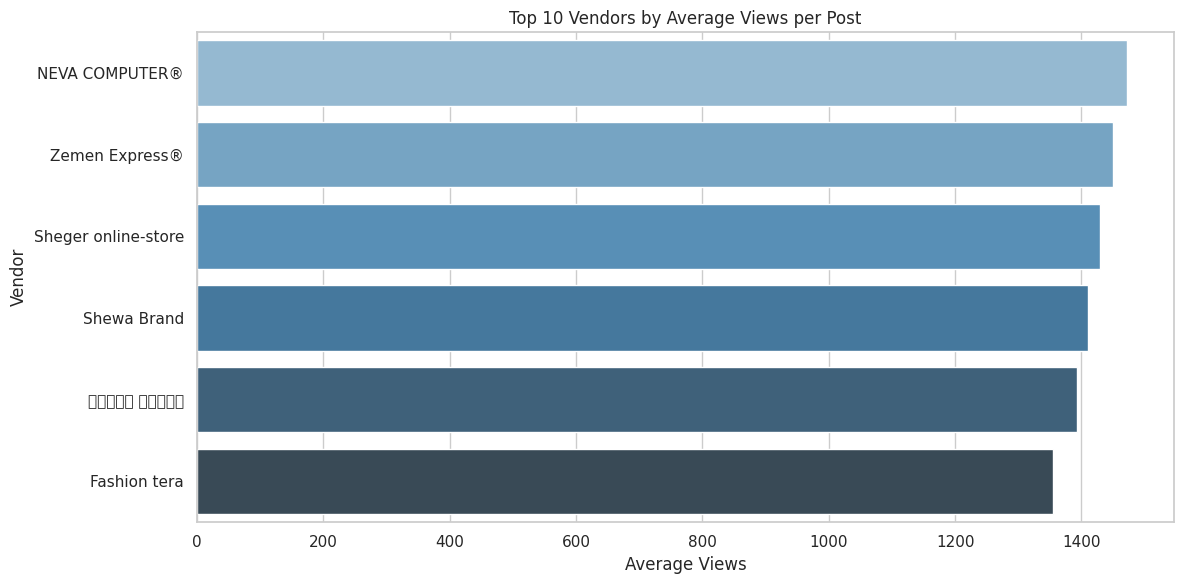

/tmp/ipython-input-56-866274741.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_posts, x="Posts/Week", y="Vendor", palette="Greens_d")
/tmp/ipython-input-56-866274741.py:29: UserWarning: Glyph 9398 (\N{CIRCLED LATIN CAPITAL LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:29: UserWarning: Glyph 9415 (\N{CIRCLED LATIN CAPITAL LETTER R}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:29: UserWarning: Glyph 9401 (\N{CIRCLED LATIN CAPITAL LETTER D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:29: UserWarning: Glyph 9399 (\N{CIRCLED LATIN CAPITAL LETTER B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:29: UserWarning: Glyph 9411 (\N{CIRCLED LATIN

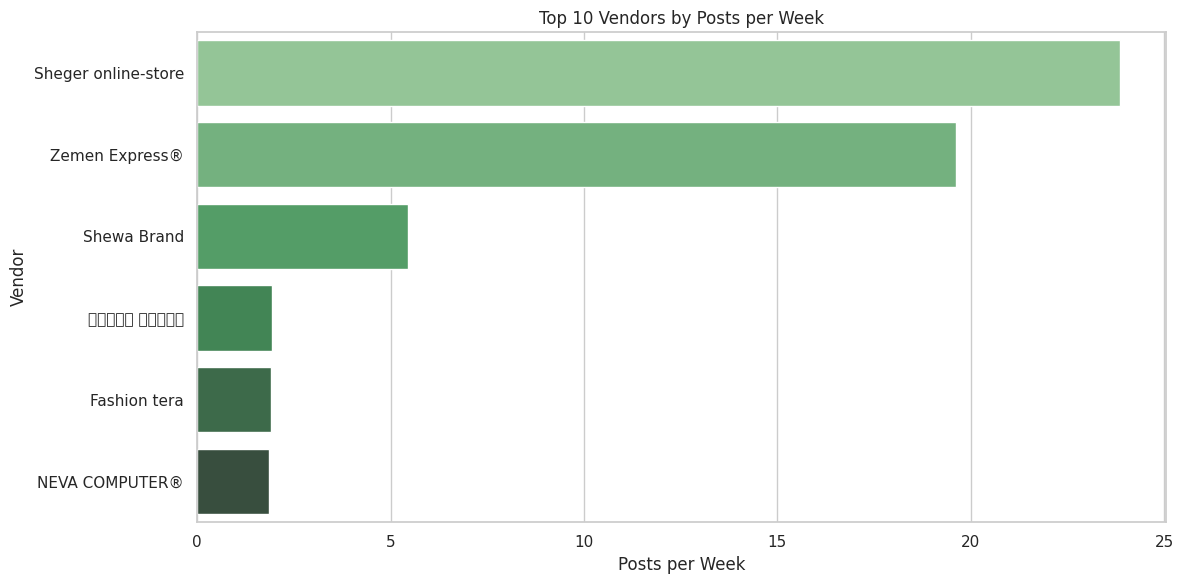

/tmp/ipython-input-56-866274741.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_lending, x="Lending Score", y="Vendor", palette="Purples_d")
/tmp/ipython-input-56-866274741.py:40: UserWarning: Glyph 9398 (\N{CIRCLED LATIN CAPITAL LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:40: UserWarning: Glyph 9415 (\N{CIRCLED LATIN CAPITAL LETTER R}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:40: UserWarning: Glyph 9401 (\N{CIRCLED LATIN CAPITAL LETTER D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:40: UserWarning: Glyph 9399 (\N{CIRCLED LATIN CAPITAL LETTER B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-866274741.py:40: UserWarning: Glyph 9411 (\N{CIRCLED

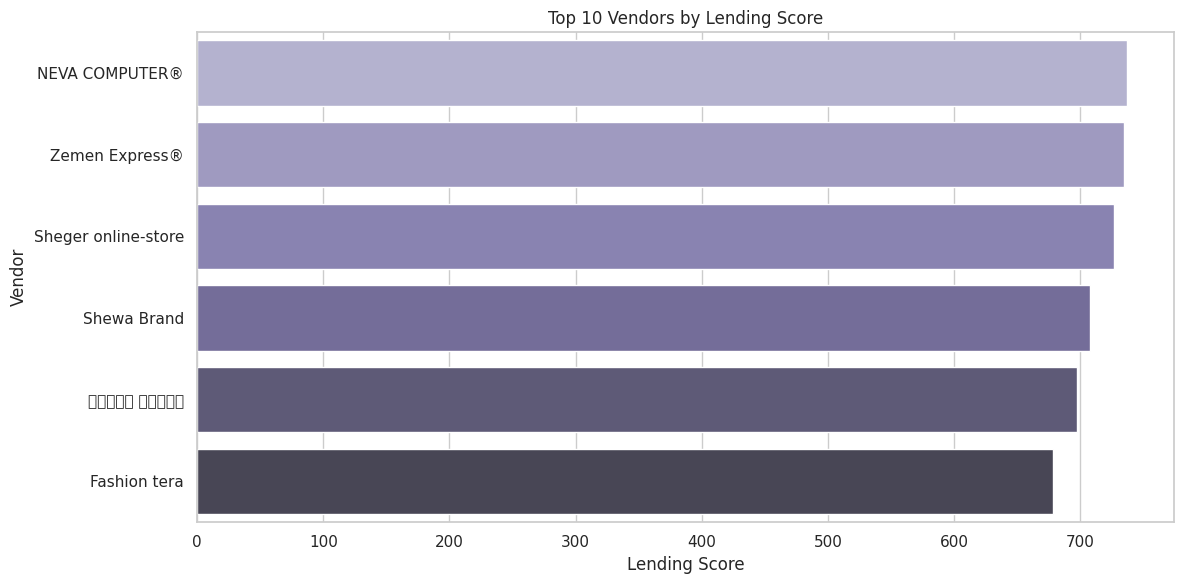

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the vendor scorecard data
scorecard_df = pd.read_csv("vendor_scorecard.csv")

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot 1: Average Views per Post (Top 10 Vendors)
plt.figure(figsize=(12, 6))
top_views = scorecard_df.sort_values("Avg. Views/Post", ascending=False).head(10)
sns.barplot(data=top_views, x="Avg. Views/Post", y="Vendor", palette="Blues_d")
plt.title("Top 10 Vendors by Average Views per Post")
plt.xlabel("Average Views")
plt.ylabel("Vendor")
plt.tight_layout()
plt.savefig("top_avg_views.png")
plt.show()

# Plot 2: Posts per Week (Top 10 Vendors)
plt.figure(figsize=(12, 6))
top_posts = scorecard_df.sort_values("Posts/Week", ascending=False).head(10)
sns.barplot(data=top_posts, x="Posts/Week", y="Vendor", palette="Greens_d")
plt.title("Top 10 Vendors by Posts per Week")
plt.xlabel("Posts per Week")
plt.ylabel("Vendor")
plt.tight_layout()
plt.savefig("top_posts_per_week.png")
plt.show()

# Plot 3: Lending Score (Top 10 Vendors)
plt.figure(figsize=(12, 6))
top_lending = scorecard_df.sort_values("Lending Score", ascending=False).head(10)
sns.barplot(data=top_lending, x="Lending Score", y="Vendor", palette="Purples_d")
plt.title("Top 10 Vendors by Lending Score")
plt.xlabel("Lending Score")
plt.ylabel("Vendor")
plt.tight_layout()
plt.savefig("top_lending_score.png")
plt.show()
